# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="setting-boundaries-to-parameter-space-1" href="#setting-boundaries-to-parameter-space"><span class="toc-item-num">1&nbsp;&nbsp;</span>setting boundaries to parameter space</a></div><div class="lev1 toc-item"><a data-toc-modified-id="define-parallel-function-2" href="#define-parallel-function"><span class="toc-item-num">2&nbsp;&nbsp;</span>define parallel function</a></div><div class="lev1 toc-item"><a data-toc-modified-id="run-optimisation-3" href="#run-optimisation"><span class="toc-item-num">3&nbsp;&nbsp;</span>run optimisation</a></div><div class="lev1 toc-item"><a data-toc-modified-id="analyse-output-4" href="#analyse-output"><span class="toc-item-num">4&nbsp;&nbsp;</span>analyse output</a></div><div class="lev2 toc-item"><a data-toc-modified-id="check-warnflags-41" href="#check-warnflags"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>check warnflags</a></div><div class="lev1 toc-item"><a data-toc-modified-id="change-optimsation-algorithm-5" href="#change-optimsation-algorithm"><span class="toc-item-num">5&nbsp;&nbsp;</span>change optimsation algorithm</a></div><div class="lev1 toc-item"><a data-toc-modified-id="rerun-optimsation-6" href="#rerun-optimsation"><span class="toc-item-num">6&nbsp;&nbsp;</span>rerun optimsation</a></div><div class="lev2 toc-item"><a data-toc-modified-id="check-warnflags-61" href="#check-warnflags"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>check warnflags</a></div><div class="lev1 toc-item"><a data-toc-modified-id="increase-maxiter-7" href="#increase-maxiter"><span class="toc-item-num">7&nbsp;&nbsp;</span>increase <code>maxiter</code></a></div><div class="lev1 toc-item"><a data-toc-modified-id="rerun-optimisation-8" href="#rerun-optimisation"><span class="toc-item-num">8&nbsp;&nbsp;</span>rerun optimisation</a></div><div class="lev1 toc-item"><a data-toc-modified-id="concurrent-executor-9" href="#concurrent-executor"><span class="toc-item-num">9&nbsp;&nbsp;</span>concurrent executor</a></div><div class="lev2 toc-item"><a data-toc-modified-id="run-optimisations-91" href="#run-optimisations"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>run optimisations</a></div><div class="lev2 toc-item"><a data-toc-modified-id="collect-output-92" href="#collect-output"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>collect output</a></div><div class="lev2 toc-item"><a data-toc-modified-id="check-warnflags-93" href="#check-warnflags"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>check warnflags</a></div><div class="lev2 toc-item"><a data-toc-modified-id="check-convergence-94" href="#check-convergence"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>check convergence</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Opt.-with-perturbed-nearly-optimal-p.-values-95" href="#Opt.-with-perturbed-nearly-optimal-p.-values"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Opt. with perturbed nearly optimal p. values</a></div><div class="lev2 toc-item"><a data-toc-modified-id="parallelus-96" href="#parallelus"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>parallelus</a></div><div class="lev3 toc-item"><a data-toc-modified-id="collect-output-961" href="#collect-output"><span class="toc-item-num">9.6.1&nbsp;&nbsp;</span>collect output</a></div><div class="lev3 toc-item"><a data-toc-modified-id="check-warnflags-962" href="#check-warnflags"><span class="toc-item-num">9.6.2&nbsp;&nbsp;</span>check warnflags</a></div><div class="lev3 toc-item"><a data-toc-modified-id="masking-outliers-963" href="#masking-outliers"><span class="toc-item-num">9.6.3&nbsp;&nbsp;</span>masking outliers</a></div>

In [1]:
from ipyparallel import Client

cl = Client()

cl.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [2]:
# clear the namespace in engines
cl.clear()

%px %who

[stdout:0] Interactive namespace is empty.
[stdout:1] Interactive namespace is empty.
[stdout:2] Interactive namespace is empty.
[stdout:3] Interactive namespace is empty.
[stdout:4] Interactive namespace is empty.
[stdout:5] Interactive namespace is empty.
[stdout:6] Interactive namespace is empty.
[stdout:7] Interactive namespace is empty.
[stdout:8] Interactive namespace is empty.
[stdout:9] Interactive namespace is empty.
[stdout:10] Interactive namespace is empty.
[stdout:11] Interactive namespace is empty.


In [3]:
%%px --local

# run whole cell on all engines a well as in the local IPython session

import numpy as np

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

In [4]:
%%px --local

# import 1D spectrum of ery on all engines:
fs_ery = dadi.Spectrum.from_file('dadiExercises/ERY.FOLDED.sfs.dadi_format')

# import 1D spectrum of ery on all engines:
fs_par = dadi.Spectrum.from_file('dadiExercises/PAR.FOLDED.sfs.dadi_format')

In [5]:
%%px --local

ns = fs_ery.sample_sizes # both populations have the same sample size

fs_ery.pop_ids = ['ery']
fs_par.pop_ids = ['par']

# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [50, 60, 70]

In [ ]:
?dadi.Demographics1D.bottlegrowth

The built-in `bottlegrowth` model specifies an instantaneous size change $T \times 2N_{ref}$ generations in the past immediately followed by the start of exponential growth (or decline) toward the contemporary population size. The model has three parameters: 
- ratio of population size after instantaneous size change with respect to the ancient population size ($N_{ref}$)
- time of instantaneous size change in $2N_{ref}$ generations in the past
- ratio of contemporary to ancient population size

In [6]:
%%px --local

# create link to function that specifies the model
func = dadi.Demographics1D.bottlegrowth

# create extrapolating version of the model function
func_ex = dadi.Numerics.make_extrap_log_func(func)

# setting boundaries to parameter space

In [7]:
%%px

# set lower and upper bounds to nuB, nuF and T
upper_bound = [1e4, 1e4, 4]
lower_bound = [1e-4, 1e-4, 0]

In [8]:
import numpy as np

# create range of starting values evenly distributed in log space
p0_nuB = np.logspace(-3, 3, base=10.0, num=6)
p0_nuF = np.logspace(-3, 3, base=10.0, num=6)
p0_T = np.logspace(-4, np.log10(4), base=10, num=6)

In [9]:
# number of starting parameter combinations:

6**3

216

# define parallel function

In [10]:
# create load balanced view of engines

lbview = cl.load_balanced_view()

In [11]:
def run_dadi(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    if perturb == True:
        p_init = dadi.Misc.perturb_params(p_init, fold=fold, 
                                      upper_bound=upper_bound, lower_bound=lower_bound)
        # note upper_bound and lower_bound variables are expected to be in the namespace of each engine
    # run optimisation of paramters
    popt = dadi_opt_func(p0=p_init, data=sfs, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=verbose, maxiter=maxiter, full_output=full_output)
    return popt

# run optimisation

The following cell is very inportant for the upper function `run_dadi` to work. It creates global variables on all engines, which are called by the function (instead of supplied to the function, which is difficult to implement).

In [21]:
%%px

# set up global variables on engines required for run_dadi function call

dadi_opt_func = dadi.Inference.optimize_log # uses gradient based BFGS algorithm
sfs = fs_ery # use ERY spectrum
perturb = False
fold = 1
maxiter = 3 # run a maximum of 3 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)

Check what's in the namespace of the engines:

In [13]:
%px %who

[stdout:0] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:1] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:2] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:3] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:4] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:5] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:6] 
dadi

In [14]:
from itertools import product, izip

In [15]:
for i, c in enumerate(product(p0_nuB, p0_nuF, p0_T)):
    if i>10: break
    print c

(0.001, 0.001, 0.0001)
(0.001, 0.001, 0.00083255320740187322)
(0.001, 0.001, 0.0069314484315514645)
(0.001, 0.001, 0.057707996236288549)
(0.001, 0.001, 0.48044977359257257)
(0.001, 0.001, 4.0)
(0.001, 0.015848931924611134, 0.0001)
(0.001, 0.015848931924611134, 0.00083255320740187322)
(0.001, 0.015848931924611134, 0.0069314484315514645)
(0.001, 0.015848931924611134, 0.057707996236288549)
(0.001, 0.015848931924611134, 0.48044977359257257)


During these optimisations, there are usually a few that run much longer than the rest. I would like to be able to interrupt those runs. The following is taken from an [issue thread at the ipyparallel github repo](https://github.com/ipython/ipyparallel/issues/141):

In [16]:
%%px --local

import os

In [17]:
engine_pids = cl[:].apply(os.getpid).get_dict()

In [18]:
engine_pids

{0: 64573,
 1: 64576,
 2: 64579,
 3: 64582,
 4: 64587,
 5: 64592,
 6: 64604,
 7: 64616,
 8: 64628,
 9: 64645,
 10: 64662,
 11: 64674}

In [20]:
import signal
# define function to interrupt an engine
def signal_engine(engine_id, sig=signal.SIGINT):
    """send a signal to a local engine"""
    pid = engine_pids[engine_id]
    os.kill(pid, sig)

In [33]:
# run optimnisations with all combinations of starting values

# DO NOT RUN
ar_ery = lbview.map(run_dadi, product(p0_nuB, p0_nuF, p0_T), block=False, order=True)

In [34]:
ar_ery.progress

7

In [35]:
for ID in cl.ids:
    signal_engine(ID)

In [36]:
cl.ids

[3]

This has no effect. Engines keep running. The only way to stop them is by shutting down the whole ipcluster.

In [31]:
# total running time in minutes

ar_ery.elapsed/60

6.3725393

# analyse output

## check warnflags

In [23]:
from collections import defaultdict

In [24]:
def get_flag_count(ar, NM=True):
    """
    ar: asyncresult object from BFGS or Nelder-Mead optimisation
    """
    if NM: # if ar from Nelder-Mead
        i = 4 # the warnflag is reported at index position 4 in the output array
    else: # ar from BFGS optimisation
        i = 6
    
    warnflag = defaultdict(int)

    for res in ar:
        if res[i] == 1:
            warnflag[1] +=1
        elif res[i] == 2:
            warnflag[2] += 1
        elif res[i] == 0:
            warnflag[0] += 1
        else:
            warnflag[999] +=1
    if NM:
        print "success", warnflag[0]
        print "Maximum number of function evaluations made.", warnflag[1]
        print "Maximum number of iterations reached.", warnflag[2]
        print "unknown flag", warnflag[999]
    else:
        print "success", warnflag[0]
        print "Maximum number of iterations exceeded.", warnflag[1]
        print "Gradient and/or function calls not changing.", warnflag[2]
        print "unknown flag", warnflag[999]

In [ ]:
get_flag_count(ar_ery, NM=False)

Almost no optimisation was successfull, mostly because of lacking gradient in the likelihood function. This calls for the other optimsation algorithm that is more robust to noise in the data: [Nelder-Mead](http://www.scipy-lectures.org/advanced/mathematical_optimization/index.html#gradient-less-methods).

# change optimsation algorithm

In [ ]:
?dadi.Inference.optimize_log_fmin

In [ ]:
%%px

dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm

# rerun optimsation

In [ ]:
# run optimnisations with all combinations of starting values

ar_ery = lbview.map(run_dadi, product(p0_nuB, p0_nuF, p0_T), block=False, order=True)

In [ ]:
ar_ery.progress

In [ ]:
ar_ery.elapsed/60

## check warnflags

In [ ]:
get_flag_count(ar_ery, NM=True)

In [ ]:
cl[0]['maxiter']

I need to extend the maximum number of iterations allowed per optimisation in order to get any results.

# increase `maxiter`

In [ ]:
%%px

maxiter = 50

In [ ]:
cl[:]['maxiter']

# rerun optimisation

In [ ]:
# run optimnisations with all combinations of starting values

# DO NOT RUN

ar_ery = lbview.map(run_dadi, product(p0_nuB, p0_nuF, p0_T), block=False, order=True)

In [ ]:
ar_ery.progress

In [ ]:
ar_ery.elapsed/60

This runs too long! Again, most of the time just on two cores. I cannot wait that long for exploratory analyses. Unfortunately, I cannot interrupt those long lasting jobs on the remote engines once they have started. If I shutdown the whole IPython cluster of engines, I cannot retrieve the information from the jobs that finished earlier (and did not get aborted). I think I need to be able to abort jobs that last too long but still have access to the results of the other jobs.

The only solution I can think of at the moment is to write a python script that takes initial starting values as input (like the function `run_dadi`), runs dadi optimisation with it and spits out the optimal parameter values to a separate file. Then I start this script in many subprocesses, thereby running in many instances in parallel on many initial parameter values and I would be able to interrupt the parent process (that initiates the subprocesses) without loosing the output from already completed subprocesses.

Also look at these two `ipyparallel` forum entries: [1](https://github.com/ipython/ipyparallel/issues/141) and [2](https://github.com/ipython/ipyparallel/issues/229). However, `os.kill` does not seem to have an effect. Jobs just keep running. I don't know why it does not work and don't have the time (nor the nerves) to find out why.

In [ ]:
def flatten(array):
    """
        Returns a list of flattened elements of every inner lists (or tuples)
        ****RECURSIVE****
    """
    res = []
    for el in array:
        if isinstance(el, (list, tuple)):
            res.extend(flatten(el))
            continue
        res.append(el)
    return res

In [ ]:
# create parallel function with load balancing

@lbview.parallel(block=True)
def get_ll(p):
    """
    p: parameter combination
    
    First, calculates the best-fit model SFS given paramter combination p.
    Then returns the log likelihood of the expected SFS given the observed SFS.
    """
    expected_sfs = func_ex(p, ns, pts_l)
    return dadi.Inference.ll_multinom(expected_sfs, sfs)
    # expected_sfs does not need to be folded, ll_multinom does that automatically
    # make sure that sfs points to right spectrum

---

# concurrent executor

Due to the issues with job control in the ipyparallel package, I am forced to use a more low-level parallel framework.

Do a kernel restart from the menu above in order to clear the namespace for a fresh restart!

In [1]:
%whos

Interactive namespace is empty.


I have written a python script called `run_dadi.py`, which can take many command line arguments and in the following parallel framework is the replacement for the `run_dadi` function from above.

In [2]:
% ll

total 1560
-rw-rw-r-- 1 claudius 591496 Apr 16 20:11 01_dadi_1D_exp_growth.ipynb
-rw-rw-r-- 1 claudius 249307 Apr 15 20:07 02_dadi_1D_two_epoch.ipynb
-rw-rw-r-- 1 claudius  72091 Apr 18 18:38 03_1D_bottlegrowth.ipynb
-rw-rw-r-- 1 claudius 444732 Apr 15 13:52 1D_models.ipynb
-rw-rw-r-- 1 claudius  33125 Apr  8 18:15 1D_two_epoch_opt_res_ERY.dill
-rw-rw-r-- 1 claudius  16613 Apr  8 19:18 1D_two_epoch_opt_res_PAR.dill
drwxrwxr-x 4 claudius   4096 Mar 24 20:08 dadiExercises/
-rw-rw-r-- 1 claudius  36308 Apr  3 20:33 ery_fold_comp.png
-rw-rw-r-- 1 claudius   3560 Mar 25 08:40 EryPar.FOLDED.2dsfs
-rw-rw-r-- 1 claudius    433 Mar 24 20:15 ERY.unfolded.sfs
-rw-rw-r-- 1 claudius    421 Mar 24 20:14 ERY.unfolded.sfs~
-rw-rw-r-- 1 claudius  13913 Apr  6 15:03 exp_growth_optim_res_ERY.pickle
-rw-rw-r-- 1 claudius  13913 Apr  6 19:21 exp_growth_optim_res_PAR.pickle
drwxrwxr-x 2 claudius  20480 Apr 18 13:21 OUT_run_dadi/
-rw-rw-r-- 1 claudius  37242 Apr  3 20:35 par_fold_comp.png
-rw-rw-r-- 1 claudi

Let's have a look at `run_dadi.py`.

In [3]:
%less run_dadi.py

In [4]:
! ./run_dadi.py -h

usage: run_dadi.py [-h] [-p PATH_TO_SPECTRUM_FILE] [-m DADI_MODEL] [-u UPPER]
                   [-l LOWER] [-i P_INIT] [-d DADI_OPT_FUNC] [-s STUB]
                   [--maxiter MAXITER]

runs dadi optimisation of parameters for given model

optional arguments:
  -h, --help            show this help message and exit
  -p PATH_TO_SPECTRUM_FILE, --path_to_spectrum_file PATH_TO_SPECTRUM_FILE
                        file path to site frequency data
  -m DADI_MODEL, --dadi_model DADI_MODEL
                        model function to use
  -u UPPER, --upper UPPER
                        upper parameter bound
  -l LOWER, --lower LOWER
                        lower parameter bound
  -i P_INIT, --p_init P_INIT
                        initial parameter values
  -d DADI_OPT_FUNC, --dadi_opt_func DADI_OPT_FUNC
                        dadi optimisation function to use
  -s STUB, --stub STUB  file name stub for output files
  --maxiter MAXITER     maximum number of iterations allowed


In [46]:
import multiprocessing
import subprocess32 as subprocess
import time, signal, os

In [2]:
%pdoc subprocess

See the [readme of the subprocess32 module](https://github.com/google/python-subprocess32). 

In [6]:
subprocess.__name__

'subprocess32'

In [7]:
multiprocessing.cpu_count()

24

There are only 12 physical cores on huluvu (6 dual-core CPU's').

In [47]:
from itertools import product
import numpy as np

In [48]:
# set lower and upper bounds to nuB, nuF and T
upper_bound = [1e4, 1e4, 4]
lower_bound = [1e-4, 1e-4, 0]

In [10]:
str(upper_bound)

'[10000.0, 10000.0, 4]'

In [49]:
# create range of starting values evenly distributed in log space
p0_nuB = np.logspace(-3, 3, base=10.0, num=6)
p0_nuF = np.logspace(-3, 3, base=10.0, num=6)
p0_T = np.logspace(-4, np.log10(4), base=10, num=6)

In [12]:
for i, comb in enumerate(product(p0_nuB, p0_nuF, p0_T)):
    print comb
    if i > 10: break

(0.001, 0.001, 0.0001)
(0.001, 0.001, 0.00083255320740187322)
(0.001, 0.001, 0.0069314484315514645)
(0.001, 0.001, 0.057707996236288549)
(0.001, 0.001, 0.48044977359257257)
(0.001, 0.001, 4.0)
(0.001, 0.015848931924611134, 0.0001)
(0.001, 0.015848931924611134, 0.00083255320740187322)
(0.001, 0.015848931924611134, 0.0069314484315514645)
(0.001, 0.015848931924611134, 0.057707996236288549)
(0.001, 0.015848931924611134, 0.48044977359257257)
(0.001, 0.015848931924611134, 4.0)


In [50]:
import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

The following variables will be passed as string values to `run_dadi.py`:

In [14]:
path_to_spectrum_file = "dadiExercises/ERY.FOLDED.sfs.dadi_format"
dadi_model = "dadi.Demographics1D.bottlegrowth"
upper = str(upper_bound)
lower = str(lower_bound)
dadi_opt_func = "dadi.Inference.optimize_log_fmin"
stub = "bottlegrowth_NM"
maxiter = 100

In [16]:
% ll dadiExercises/

total 33676
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 ERY.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/ERY/ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius      499 Mar 24 14:04 ERY.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      499 Mar 24 14:02 ERY.FOLDED.sfs.dadi_format~
lrwxrwxrwx 1 claudius       37 Feb 18 17:46 EryPar.unfolded.2dsfs -> ../../ANGSD/FST/EryPar.unfolded.2dsfs
-rw-rw-r-- 1 claudius    13051 Feb 18 19:00 EryPar.unfolded.2dsfs.dadi_format
-rw-rw-r-- 1 claudius    13051 Feb 18 18:31 EryPar.unfolded.2dsfs.dadi_format~
drwxrwxr-x 5 claudius     4096 Feb 17 13:45 examples/
-rw-rw-r-- 1 claudius   155251 Mar 22 12:37 example_YRI_CEU.ipynb
-rw-rw-r-- 1 claudius   619518 Mar 21 11:09 First_Steps_with_dadi.ipynb
-rw-rw-r-- 1 claudius     1012 Mar 16 09:54 new.bib
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 PAR.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/PAR/PAR.FOLDED.sfs
-rw-rw-r-- 1 claudius      486 Mar 24 20:08 PAR.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      450 Mar

In [15]:
# check creation of command line

for i, p_init in enumerate(product(p0_nuB, p0_nuF, p0_T)):
    cmd = "./run_dadi.py -p %s -m %s -u '%s' -l '%s' -d %s -s %s --maxiter %s -i '%s'" \
                % (path_to_spectrum_file, dadi_model, upper, lower, dadi_opt_func, stub, str(maxiter), str(p_init))
    print cmd
    if i >= 0: break

./run_dadi.py -p dadiExercises/ERY.FOLDED.sfs.dadi_format -m dadi.Demographics1D.bottlegrowth -u '[10000.0, 10000.0, 4]' -l '[0.0001, 0.0001, 0]' -d dadi.Inference.optimize_log_fmin -s bottlegrowth_NM --maxiter 100 -i '(0.001, 0.001, 0.0001)'


Next, I need to define an executor class. This is taken from Tiago Antao's Cookbook:

In [54]:
class executor:
    def __init__(self, limit):
        self.limit = limit
        self.ncores = multiprocessing.cpu_count()
        self.running = []
        self.finished = 0

    def submit(self, cmd, p_init):
        #self.progress()
        self.wait()
        if hasattr(self, 'out'):
            out = self.out
        else:
            out = '/dev/null'
        if hasattr(self, 'err'):
            err = self.err
        else:
            err = '/dev/null'
        if err == 'stderr':
            errSt = ''
        else:
            errSt = '2> ' + err
        proc = subprocess.Popen('%s > %s %s' % (cmd, out, errSt), shell=True)
        self.running.append(proc)
        #print "started running optimsation with " + str(p_init)
        #print "started subprocess with process id" + str(proc.pid)
        if hasattr(self, 'out'):
            del self.out
        if hasattr(self, 'err'):
            del self.err
            
    def wait(self, for_all=False):
        self.clean_done()
        #numWaits = 0
        if self.limit > 0 and type(self.limit) == int:
            cond = 'len(self.running) >= self.ncores - self.limit'
        elif self.limit < 0:
            cond = 'len(self.running) >= - self.limit'
        else:
            cond = 'len(self.running) >= self.ncores * self.limit'
        while eval(cond) or (for_all and len(self.running) > 0):
            time.sleep(1)
            self.clean_done() # updates self.running, removes finished jobs from the running queue
            #numWaits += 1
            
    def clean_done(self):
        terminated = []
        for i, p in enumerate(self.running):
            if p.poll() is not None: # None means it's still running
                terminated.append(i)
        for idx in reversed(terminated):
            del self.running[idx]
            self.finished += 1
            
    def progress(self):
        self.clean_done()
        #for p in self.running:
        #    if p.poll() is not None:
        #        print "subprocess with process id %d reports that it has finished" % (p.pid)
        #    else:
        #        print "subprocess with process id %d reports that it is still running" % (p.pid)
        print self.finished
        
#    def kill_all(self):
#        import os, signal
#        self.clean_done()
#        for p in self.running:
#            os.kill(p.pid, signal.SIGINT)
#        self.clean_done()
# None of my attempts to kill the subprocesses has worked. 
# It seems they simply become disconnected, but still continue running.

## run optimisations

In [ ]:
%%time

E = executor(limit=-12) # leave 4 cores unused

# this will block
for i, p_init in enumerate(product(p0_nuB, p0_nuF, p0_T)):
    cmd = "./run_dadi.py -p %s -m %s -u '%s' -l '%s' -d %s -s %s --maxiter %s -i '%s'" \
                % (path_to_spectrum_file, dadi_model, upper, lower, dadi_opt_func, stub, str(maxiter), str(p_init))
    E.err = "stderr"
    E.submit(cmd, p_init)
    #if i >= 9: break

0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
4
4
6
6
8
8
10
10
11
12
13
15
15
17
17
18
19
20
21
23
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
57
57
59
59
61
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
84
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
139
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158


In [21]:
E.progress()

208


The last 8 optimisations take an exceptionally long time to run.

When I want to kill all processes that are still running, I can execute the following command line in the shell:

    sudo pgrep -f "python ./run_dadi" | xargs kill

In [22]:
E.progress()

216


In [24]:
% ll OUT_run_dadi/*pickle | wc -l

208


Of 216 initial parameter combinations, 208 produced optimisation output file.

This parallel framework, albeit much more laborious to implement than using ipyparallel, has proven useful so far. It allows me to run many optimisations in parallel, save output of individual optimisation runs to file, abort the final long lasting runs from the command line and still be able to retrieve the information from the successful runs. This is something I could not do with ipyparallel, which forced me to always wait until all optimisation jobs had finished or else loose all the output.

## collect output

The script `run_dadi.py` has pickled the optimsation results to individual files for each initial parameter combination. They are located in the directory `OUT_run_dadi`. I now want to read these output files into a single data structure.

In [11]:
import pickle

In [12]:
import glob

pickled = glob.glob('OUT_run_dadi/*pickle')
sorted(pickled[:10])

['OUT_run_dadi/bottlegrowth_NM_0.001000_0.015849_0.000100.pickle',
 'OUT_run_dadi/bottlegrowth_NM_0.001000_0.251189_0.480450.pickle',
 'OUT_run_dadi/bottlegrowth_NM_0.251189_0.001000_0.000100.pickle',
 'OUT_run_dadi/bottlegrowth_NM_0.251189_63_0.480450.pickle',
 'OUT_run_dadi/bottlegrowth_NM_1000_1000_4.pickle',
 'OUT_run_dadi/bottlegrowth_NM_1000_63_0.057708.pickle',
 'OUT_run_dadi/bottlegrowth_NM_3_1000_0.000100.pickle',
 'OUT_run_dadi/bottlegrowth_NM_63_0.015849_0.000833.pickle',
 'OUT_run_dadi/bottlegrowth_NM_63_0.015849_4.pickle',
 'OUT_run_dadi/bottlegrowth_NM_63_63_0.000100.pickle']

In [13]:
opt_out = []
for filename in glob.iglob('OUT_run_dadi/*pickle'):
    opt_out.append( pickle.load(open(filename, "r")) )

In [14]:
len(opt_out)

208

I killed the 8 last running processes.

In [202]:
# check
opt_out[0]

((0.001, 0.25118864315095796, 0.48044977359257257),
 (array([ 0.69928844,  0.03905784,  1.63770723]),
  2438.4426300145751,
  100,
  182,
  2))

Look's good.

## check warnflags

In order to get the flag count over these optimisations, I need to modify the previous function slightly, as it now handles slightly different input (list of tuples instead AsyncResult object).

In [38]:
def get_flag_count(out, NM=True):
    """
    out: list of tuples, each containing p_init and popt + additional info, including warnflags
    as produced by run_dadi.py
    """
    from collections import defaultdict
    
    if NM: # if ar from Nelder-Mead
        i = 4 # the warnflag is reported at index position 4 in the output array
    else: # ar from BFGS optimisation
        i = 6
    
    warnflag = defaultdict(int)

    for res in out:
        if res[1][i] == 1: # notice the change in indexing
            warnflag[1] +=1
        elif res[1][i] == 2:
            warnflag[2] += 1
        elif res[1][i] == 0:
            warnflag[0] += 1
        else:
            warnflag[999] +=1
    if NM:
        print "success", warnflag[0]
        print "Maximum number of function evaluations made.", warnflag[1]
        print "Maximum number of iterations reached.", warnflag[2]
        print "unknown flag", warnflag[999]
    else:
        print "success", warnflag[0]
        print "Maximum number of iterations exceeded.", warnflag[1]
        print "Gradient and/or function calls not changing.", warnflag[2]
        print "unknown flag", warnflag[999]

In [31]:
get_flag_count(opt_out, NM=True)

success 27
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 181
unknown flag 0


Only 27 optimisations were successfull.

In [207]:
maxiter

100

I have run each optimisation allowing for up to 100 iterations. This should be plenty.

In [32]:
dadi_opt_func

'dadi.Inference.optimize_log_fmin'

I have done the optimisations using the [Nelder-Mead optimisation algorithm](http://www.scipy-lectures.org/advanced/mathematical_optimization/index.html#gradient-less-methods) that should be more robust with noisy data than gradient based algorithms (like BFGS).

## check convergence

In [33]:
type(opt_out[0][1][0])

numpy.ndarray

Add this type of object to list of objects to flatten in the following function.

In [15]:
def flatten(array):
    """
        Returns a list of flattened elements of every inner lists (or tuples)
        ****RECURSIVE****
    """
    import numpy
    res = []
    for el in array:
        if isinstance(el, (list, tuple, numpy.ndarray)):
            res.extend(flatten(el))
            continue
        res.append(el)
    return list( res )

In [16]:
def get_ll(p):
    """
    p: parameter combination
    
    First, calculates the best-fit model SFS given paramter combination p.
    Then returns the log likelihood of the expected SFS given the observed SFS.
    """
    expected_sfs = func_ex(p, ns, pts_l)
    return dadi.Inference.ll_multinom(expected_sfs, sfs)
    # expected_sfs does not need to be folded, ll_multinom does that automatically
    # make sure that sfs points to right spectrum

In [17]:
# import 1D spectrum of ery on all engines:
fs_ery = dadi.Spectrum.from_file('dadiExercises/ERY.FOLDED.sfs.dadi_format')

# create link to function that specifies the model
func = dadi.Demographics1D.bottlegrowth

# create extrapolating version of the model function
func_ex = dadi.Numerics.make_extrap_log_func(func)

ns = fs_ery.sample_sizes # both populations have the same sample size

fs_ery.pop_ids = ['ery']

# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [50, 60, 70]

sfs = fs_ery

In [18]:
# check get_ll works

ll = get_ll(opt_out[0][1][0])
ll

-2438.5125398433665

In [40]:
# check addition of logL to list of parameters

flatten(opt_out[0])[:6] + ['aaaaa']

[0.001,
 0.25118864315095796,
 0.48044977359257257,
 0.6992884442845132,
 0.039057837813898537,
 1.6377072306882821,
 'aaaaa']

In [19]:
successfull_popt = [flatten(out)[:6]  + [get_ll(out[1][0])] for out in opt_out if out[1][4] == 0]

In [42]:
successfull_popt[:3]

[[1000.0,
  1000.0,
  0.0069314484315514645,
  0.00027865170517505516,
  5024.6013219799443,
  5.8777224111832795e-17,
  -2460.8445858070409],
 [63.0957344480193,
  63.0957344480193,
  0.0008325532074018732,
  0.0006456542290346419,
  127.83997194630471,
  3.2438899193407309e-19,
  -2460.8445858070304],
 [0.25118864315095796,
  0.015848931924611134,
  0.0008325532074018732,
  10.043880786869554,
  0.0001000005033951187,
  2.2206138673989186e-06,
  -2093.5558805233868]]

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame(data=successfull_popt, columns=['nuB_0', 'nuF_0', 'T_0', 'nuB_opt', 'nuF_opt', 'T_opt', 'logL'])

In [22]:
df.sort_values(by='logL', ascending=False)

,nuB_0,nuF_0,T_0,nuB_opt,nuF_opt,T_opt,logL
8,63.095734,0.251189,0.480450,39.786289,0.450821,3.735020e-01,-1904.760371
17,3.981072,0.251189,0.057708,39.785964,0.450815,3.734852e-01,-1904.760378
24,0.001000,0.251189,0.000100,0.000100,0.193510,2.001793e-05,-2037.570988
9,0.001000,3.981072,0.000100,0.000100,1.872775,2.606203e-05,-2037.715135
4,0.015849,3.981072,0.000833,0.000100,4.176169,2.819672e-05,-2037.756305
20,0.001000,63.095734,0.000100,0.000100,9.056516,3.025300e-05,-2037.795278
7,3.981072,63.095734,0.057708,0.440523,0.000100,2.220640e-06,-2093.555878
2,0.251189,0.015849,0.000833,10.043881,0.000100,2.220614e-06,-2093.555881
23,3.981072,0.015849,0.000833,0.099563,0.000100,2.220614e-06,-2093.555881
22,63.095734,0.001000,4.000000,410.579843,0.013006,1.955725e+00,-2438.509856


In [26]:
p_opt = df.sort_values(by='logL', ascending=False).iloc[0,3:6]
p_opt

nuB_opt    39.786289
nuF_opt     0.450821
T_opt       0.373502
Name: 8, dtype: float64

It looks promising that the best parameter combination was found twice from quite different starting values. The best parameter combination is more than 100 logL units more likely than the second best parameter combination. This result should be verified by running a few more optimisations with starting values in the vicinity of these optimal parameter values (via `perturb`). 

These optimal parameter values seem to suggest that the ancient population size first underwent a 40 fold increase at $0.37 \times 2N_{ref}$ generations ago. It then underwent exponential population decline (note, the exponential nature is assumed by the model, but may not be very realistic) to 45% of the ancient population size $N_{ref}$.

## Opt. with perturbed nearly optimal p. values

I am going to try and use ipyparallel again for the optimisations with perturbed initial parameter values.

In [1]:
from ipyparallel import Client

cl = Client()

cl.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [2]:
%%px --local

# run whole cell on all engines a well as in the local IPython session

import numpy as np

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

Note, in the following analysis, I am going to use a slightly different spectrum: unfolded from ANGSD, then folded in dadi.

In [3]:
%%px --local

# import 1D spectrum of ery on all engines:
fs_ery = dadi.Spectrum.from_file('ERY.unfolded.sfs').fold()

In [4]:
%%px --local

ns = fs_ery.sample_sizes # both populations have the same sample size

fs_ery.pop_ids = ['ery']

# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [50, 60, 70]

In [5]:
%%px --local

# create link to function that specifies the model
func = dadi.Demographics1D.bottlegrowth

# create extrapolating version of the model function
func_ex = dadi.Numerics.make_extrap_log_func(func)

In [6]:
%%px

# set lower and upper bounds to nuB, nuF and T
upper_bound = [1e4, 1e4, 4]
lower_bound = [1e-4, 1e-4, 0]

In [7]:
def run_dadi(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    if perturb == True:
        p_init = dadi.Misc.perturb_params(p_init, fold=fold, 
                                      upper_bound=upper_bound, lower_bound=lower_bound)
        # note upper_bound and lower_bound variables are expected to be in the namespace of each engine
    # run optimisation of paramters
    popt = dadi_opt_func(p0=p_init, data=sfs, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=verbose, maxiter=maxiter, full_output=full_output)
    return p_init, popt

In [8]:
# create load balanced view of engines

lbview = cl.load_balanced_view()

In [9]:
%%px

# set up global variables on engines required for run_dadi function call

dadi_opt_func = dadi.Inference.optimize_log_fmin # use Nelder-Mead algorithm
sfs = fs_ery # use ERY spectrum
perturb = True
fold = 1.5
maxiter = 100 # run a maximum of 3 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)

In [10]:
p_opt = [39.786289160859184, 0.45082070925507933, 0.37350201677769701]

In [11]:
from itertools import repeat

In [12]:
# run optimnisations with perturbed optimal parameter values as starting values
# repeat this 20 times

ar_ery = lbview.map(run_dadi, repeat(list(p_opt), 20), block=False, order=True)

In [14]:
ar_ery.wall_time

9.257099

This just takes 9 seconds to complete!

In [15]:
ar_ery.get()[0]

(array([ 47.2166873 ,   0.18749083,   0.43592681]),
 (array([ 39.20041883,   0.45760582,   0.36795039]),
  1649.9713077093563,
  80,
  141,
  0))

In [17]:
def get_flag_count(out, NM=True):
    """
    out: list of tuples, each containing p_init and popt + additional info, including warnflags
    as produced by run_dadi.py
    """
    from collections import defaultdict
    
    if NM: # if ar from Nelder-Mead
        i = 4 # the warnflag is reported at index position 4 in the output array
    else: # ar from BFGS optimisation
        i = 6
    
    warnflag = defaultdict(int)

    for res in out:
        if res[1][i] == 1: # notice the change in indexing
            warnflag[1] +=1
        elif res[1][i] == 2:
            warnflag[2] += 1
        elif res[1][i] == 0:
            warnflag[0] += 1
        else:
            warnflag[999] +=1
    if NM:
        print "success", warnflag[0]
        print "Maximum number of function evaluations made.", warnflag[1]
        print "Maximum number of iterations reached.", warnflag[2]
        print "unknown flag", warnflag[999]
    else:
        print "success", warnflag[0]
        print "Maximum number of iterations exceeded.", warnflag[1]
        print "Gradient and/or function calls not changing.", warnflag[2]
        print "unknown flag", warnflag[999]

In [18]:
get_flag_count(ar_ery, NM=True)

success 13
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 7
unknown flag 0


13 of 20 optimisations were successful.

In [20]:
def flatten(array):
    """
        Returns a list of flattened elements of every inner lists (or tuples)
        ****RECURSIVE****
    """
    import numpy
    res = []
    for el in array:
        if isinstance(el, (list, tuple, numpy.ndarray)):
            res.extend(flatten(el))
            continue
        res.append(el)
    return list( res )

In [22]:
successfull_popt = [flatten(out)[:7] for out in ar_ery if out[1][4] == 0]

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame(data=successfull_popt, columns=['nuB_0', 'nuF_0', 'T_0', 'nuB_opt', 'nuF_opt', 'T_opt', '-logL'])

In [26]:
df.sort_values(by='-logL', ascending=False)

,nuB_0,nuF_0,T_0,nuB_opt,nuF_opt,T_opt,-logL
2,21.414656,0.210739,0.462369,39.201407,0.457600,0.367940,1649.971308
11,57.883309,0.529949,0.622005,39.200694,0.457599,0.367948,1649.971308
5,94.196807,0.468070,0.791146,39.198693,0.457602,0.367938,1649.971308
8,87.446500,0.433059,0.404938,39.200026,0.457600,0.367938,1649.971308
3,17.826734,0.392610,0.263240,39.199184,0.457598,0.367939,1649.971308
6,17.409909,0.205299,0.388550,39.200632,0.457606,0.367954,1649.971308
10,18.640592,0.431983,0.578988,39.202016,0.457603,0.367948,1649.971308
0,47.216687,0.187491,0.435927,39.200419,0.457606,0.367950,1649.971308
7,21.995217,0.219187,0.151084,39.200011,0.457600,0.367943,1649.971308
1,34.143955,0.349659,0.461401,39.202789,0.457604,0.367953,1649.971308


Those optimisations that were successful all return the same optimal parameter combination.

In [27]:
import dill

dill.dump(list(ar_ery.get()), open("OUT_bottlegrowth/ERY_perturb_ar_ery.dill", "w"))

What were the initial parameter values for unsuccessful optimisations?

In [45]:
for out in ar_ery:
    if out[1][4] == 0: 
        continue
    print out[0]

[ 48.22704245   0.23116665   0.14104111]
[ 21.08068036   0.16387019   0.8128186 ]
[ 30.41258844   0.98662646   1.00768444]
[ 49.32897749   0.90683456   0.28126702]
[ 44.37634318   0.18164686   0.66956876]
[ 103.9665818     0.22647632    1.01340968]
[ 84.71196391   1.12237167   0.40601414]
[ 51.71940747   0.36247505   0.83053599]
[ 52.10863319   0.46450981   1.04614116]
[ 40.52348386   0.44643182   0.98917329]
[ 15.77841656   0.84214071   0.81465301]
[ 28.56890704   1.07801646   0.1418661 ]
[ 17.19171428   0.88793227   0.21114888]


It is worrying that the optimisation from these starting values does not converge within 100 iterations.

## parallelus

In [51]:
% ll dadiExercises/

total 33676
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 ERY.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/ERY/ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius      499 Mar 24 14:04 ERY.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      499 Mar 24 14:02 ERY.FOLDED.sfs.dadi_format~
lrwxrwxrwx 1 claudius       37 Feb 18 17:46 EryPar.unfolded.2dsfs -> ../../ANGSD/FST/EryPar.unfolded.2dsfs
-rw-rw-r-- 1 claudius    13051 Feb 18 19:00 EryPar.unfolded.2dsfs.dadi_format
-rw-rw-r-- 1 claudius    13051 Feb 18 18:31 EryPar.unfolded.2dsfs.dadi_format~
drwxrwxr-x 5 claudius     4096 Feb 17 13:45 examples/
-rw-rw-r-- 1 claudius   155251 Mar 22 12:37 example_YRI_CEU.ipynb
-rw-rw-r-- 1 claudius   619518 Mar 21 11:09 First_Steps_with_dadi.ipynb
-rw-rw-r-- 1 claudius     1012 Mar 16 09:54 new.bib
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 PAR.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/PAR/PAR.FOLDED.sfs
-rw-rw-r-- 1 claudius      486 Mar 24 20:08 PAR.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      450 Mar

In [52]:
path_to_spectrum_file = "dadiExercises/PAR.FOLDED.sfs.dadi_format"
dadi_model = "dadi.Demographics1D.bottlegrowth"
upper = str(upper_bound)
lower = str(lower_bound)
dadi_opt_func = "dadi.Inference.optimize_log_fmin"
stub = "PAR_bottlegrowth_NM"
maxiter = 100

In [53]:
# check creation of command line

for i, p_init in enumerate(product(p0_nuB, p0_nuF, p0_T)):
    cmd = "./run_dadi.py -p %s -m %s -u '%s' -l '%s' -d %s -s %s --maxiter %s -i '%s'" \
                % (path_to_spectrum_file, dadi_model, upper, lower, dadi_opt_func, stub, str(maxiter), str(p_init))
    print cmd
    if i >= 0: break

./run_dadi.py -p dadiExercises/PAR.FOLDED.sfs.dadi_format -m dadi.Demographics1D.bottlegrowth -u '[10000.0, 10000.0, 4]' -l '[0.0001, 0.0001, 0]' -d dadi.Inference.optimize_log_fmin -s PAR_bottlegrowth_NM --maxiter 100 -i '(0.001, 0.001, 0.0001)'


In [ ]:
E = executor(limit=4) # leave 4 cores unused

# this will block
for i, p_init in enumerate(product(p0_nuB, p0_nuF, p0_T)):
    cmd = "./run_dadi.py -p %s -m %s -u '%s' -l '%s' -d %s -s %s --maxiter %s -i '%s'" \
                % (path_to_spectrum_file, dadi_model, upper, lower, dadi_opt_func, stub, str(maxiter), str(p_init))
    E.err = "stderr"
    E.submit(cmd, p_init)

This runs a very long time!

Several optimisation runs take more than two hours. I have terminated those runs from the terminal with several executions of the following command:

    pgrep -of "python ./run_dadi.py" | xargs kill
    
This will kill the longest running command that has a matching command line and thereby freeing slots for new optimisations.

In [56]:
E.progress()

206


I needed to kill 26 optimisation runs because they could not finish with 1 hour.

### collect output

In [57]:
pickled = glob.glob('OUT_run_dadi/PAR*pickle')
sorted(pickled[:10])

['OUT_run_dadi/PAR_bottlegrowth_NM_0.001000_0.015849_0.480450.pickle',
 'OUT_run_dadi/PAR_bottlegrowth_NM_0.001000_3_0.006931.pickle',
 'OUT_run_dadi/PAR_bottlegrowth_NM_0.001000_63_0.006931.pickle',
 'OUT_run_dadi/PAR_bottlegrowth_NM_0.015849_1000_0.000100.pickle',
 'OUT_run_dadi/PAR_bottlegrowth_NM_1000_0.001000_4.pickle',
 'OUT_run_dadi/PAR_bottlegrowth_NM_1000_0.251189_4.pickle',
 'OUT_run_dadi/PAR_bottlegrowth_NM_1000_63_0.000100.pickle',
 'OUT_run_dadi/PAR_bottlegrowth_NM_3_0.015849_0.000833.pickle',
 'OUT_run_dadi/PAR_bottlegrowth_NM_3_63_0.057708.pickle',
 'OUT_run_dadi/PAR_bottlegrowth_NM_63_0.251189_0.000100.pickle']

In [58]:
opt_out = []
for filename in glob.glob('OUT_run_dadi/PAR*pickle'):
    opt_out.append( pickle.load(open(filename)))

In [59]:
len(opt_out)

190

In [60]:
opt_out[0]

((63.0957344480193, 0.25118864315095796, 0.0001),
 (array([  5.34600148e-03,   1.00010441e-04,   5.87763609e-07]),
  9724.1371177135079,
  100,
  188,
  2))

### check warnflags

In [61]:
get_flag_count(opt_out, NM=True)

success 59
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 131
unknown flag 0


The vast majority of optimisations could not converge to an optimum within the 100 allowed iterations.

In [63]:
# this is very important for the correct calculation of likelihoods

# import 1D spectrum of ery on all engines:
fs_par = dadi.Spectrum.from_file('dadiExercises/PAR.FOLDED.sfs.dadi_format')

sfs = fs_par

In [ ]:
# this takes too long
# DO NOT RUN
#successfull_popt = [flatten(out[:6]) + [get_ll(out[1][0])] for out in opt_out if out[1][4] == 0]

In [67]:
# create parallel function with load balancing

@lbview.parallel(block=True)
def get_ll(p):
    """
    p: parameter combination
    
    First, calculates the best-fit model SFS given paramter combination p.
    Then returns the log likelihood of the expected SFS given the observed SFS.
    """
    expected_sfs = func_ex(p, ns, pts_l)
    return dadi.Inference.ll_multinom(expected_sfs, sfs)
    # expected_sfs does not need to be folded, ll_multinom does that automatically
    # make sure that sfs points to right spectrum

In [68]:
# this takes less than 1 minute running on the virtual 20 cores in parallel
ll = get_ll.map([out[1][0] for out in opt_out if out[1][4] == 0])

In [73]:
successfull_popt = [flatten(out)[:6] for out in opt_out if out[1][4] == 0]

In [74]:
successfull_popt[:3]

[[1000.0,
  0.001,
  4.0,
  5527.8480326389508,
  4.7304302794030004,
  3.9939569937001136],
 [0.001,
  0.015848931924611134,
  0.48044977359257257,
  0.0001934721051520449,
  0.080217850935046325,
  0.4441817952921791],
 [0.25118864315095796,
  1000.0,
  0.05770799623628855,
  0.15904075244236851,
  0.00010000054911344888,
  5.8764887277769201e-07]]

In [75]:
print len(successfull_popt)
print len(ll)

59
59


In [77]:
from itertools import izip

In [80]:
i=0
for row in izip(successfull_popt, ll):
    print flatten(row)
    i+=1
    if i > 3: break

[1000.0, 0.001, 4.0, 5527.8480326389508, 4.7304302794030004, 3.9939569937001136, -3962.1699571561167]
[0.001, 0.015848931924611134, 0.48044977359257257, 0.0001934721051520449, 0.080217850935046325, 0.4441817952921791, -3851.7987143299106]
[0.25118864315095796, 1000.0, 0.05770799623628855, 0.15904075244236851, 0.00010000054911344888, 5.8764887277769201e-07, -2247.8965038632414]
[0.001, 1000.0, 0.0008325532074018732, 0.00010000041364529501, 54.149554006325246, 1.5166029232483476e-05, -2184.5319459156526]


In [81]:
p_opt = [flatten(row) for row in izip(successfull_popt, ll)] 

In [82]:
df = pd.DataFrame(data=p_opt, columns=['nuB_0', 'nuF_0', 'T_0', 'nuB_opt', 'nuF_opt', 'T_opt', 'logL'])

In [85]:
df.sort_values(by='logL', ascending=False).head(20)

,nuB_0,nuF_0,T_0,nuB_opt,nuF_opt,T_opt,logL
57,0.015849,3.981072,0.000833,0.000100,0.561802,9.917237e-06,-2184.073252
31,0.001000,3.981072,0.000833,0.000100,1.558184,1.108981e-05,-2184.259232
20,0.001000,3.981072,0.000100,0.000100,4.068024,1.219137e-05,-2184.384626
53,0.001000,1000.000000,0.000100,0.000100,47.899593,1.502786e-05,-2184.482606
16,0.001000,63.095734,0.000833,0.000100,161.634763,1.642882e-05,-2184.492843
3,0.001000,1000.000000,0.000833,0.000100,54.149554,1.516603e-05,-2184.531946
2,0.251189,1000.000000,0.057708,0.159041,0.000100,5.876489e-07,-2247.896504
4,3.981072,1000.000000,0.057708,0.259153,0.000100,5.876489e-07,-2247.896504
55,3.981072,0.001000,0.000100,1.238356,0.000100,5.876118e-07,-2247.905591
45,1000.000000,0.001000,0.000100,2.912246,0.000100,5.876118e-07,-2247.905591


There is no convergence on a set of optimal parameter values. Fitting the `bottlegrowth` model to the 1D SFS of _parallelus_ must be considered as failed.

### masking outliers

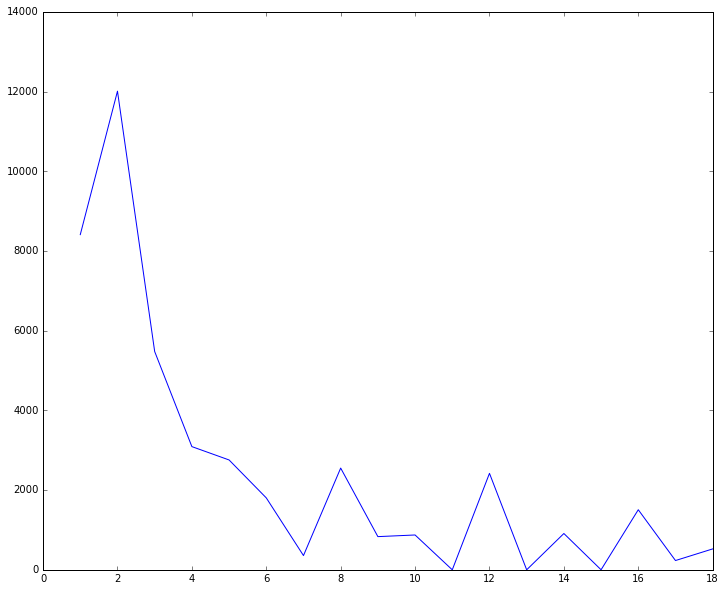

In [90]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [12.0, 10.0]

plt.plot(fs_par[:19])

Unfortunately, the first and second frequency classes show counts that are inconsistent with any demographic history. It might therefore be worthwhile to mask them out. I think masking out just one of the first two frequency classes will lead to highly biased inferences. Masking both frequency classes will reduce a lot of the power to infer the demographic history. I therefore think that at least for this SFS, masking will most likely not lead to better estimates.

In [28]:
plt.plot(fs_ery[:19])

NameError: name 'plt' is not defined

I think the same assessment needs to be made for the SFS of ery. Again, masking out just one of the first two frequency classes